## Assignment 8
### Name : Shruthi Ramu
### Student ID : 029368922

#### G. (10 points) For different τ ’s, compute the precision and recall.<br> The range of τ should be wide enough and the interval of τ should be small enough to verify the effect of τ . • Precision = # of correctly recognized images/# of recognized images • Recall = # of correctly recognized images/# of actual images of the celebrity. <br>H. (10 points) Repeat the step (f) and (g) for input images of 10 randomly selected unique celebrities. Draw the overlapped precision and recall curve as shown in Figure 1.<br> I. Submit your source code, requirements.txt and a report file. The report file should include the experimental results, discussions, and the references of the pre-trained models.

#### Performance Of Object Detection Model

For object detection we use the concept of Intersection over Union (IoU). IoU computes intersection over the union of the two bounding boxes; the bounding box for the ground truth and the predicted bounding box

In [1]:
import numpy as np
import hub
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch
from torchsummary import summary
import torchvision.models as models
import glob
from tqdm import tqdm
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(hub.__version__)

3.0.18


In [3]:
print(torch.__version__)

1.13.0


In [4]:
# create dataloader with required transforms 
tc = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()              
    ])

In [5]:
data_dir = '/Users/macuser/Documents/CSULB/Fall2022/AdvancedArtificialIntelligence/TryJupyter/Develop-face-recognition-software-using-pre-trained-YOLO-V3-and-Facenet-model./Selected_Dataset'
image_datasets = datasets.ImageFolder(data_dir, transform=tc)
dloader = torch.utils.data.DataLoader(image_datasets, batch_size=10, shuffle=False)

In [6]:
print(len(image_datasets))

1200


torch.Size([256, 256, 3])
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.2392, 0.1843, 0.1529],
         [0.0000, 0.0000, 0.0000,  ..., 0.2824, 0.2314, 0.1882],
         [0.0000, 0.0000, 0.0000,  ..., 0.2863, 0.2314, 0.1882]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.1608, 0.1098, 0.0863],
         [0.0000, 0.0000, 0.0000,  ..., 0.2039, 0.1608, 0.1216],
         [0.0000, 0.0000, 0.0000,  ..., 0.2039, 0.1608, 0.1216]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0000, 0.0000

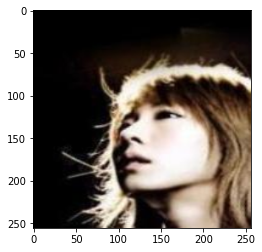

In [7]:
for img, label in dloader:
  print(np.transpose(img[0], (1,2,0)).shape)
  print(img[0])
  plt.imshow((img[0].detach().numpy().transpose(1, 2, 0)*255).astype(np.uint8))
  plt.show()
  break

In [8]:
def copy_embeddings(m, i, o):
    """Copy embeddings from the penultimate layer.
    """
    o = o[:, :, 0, 0].detach().numpy().tolist()
    outputs.append(o)

In [9]:
# fetch pretrained model
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

Using cache found in /Users/macuser/.cache/torch/hub/pytorch_vision_v0.10.0
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
# Select the desired layer
layer = model._modules.get('avgpool')
# attach hook to the penulimate layer
_ = layer.register_forward_hook(copy_embeddings)

In [11]:
outputs = []  # list of embeddings
model.eval() # Inference mode

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [12]:
# Generate image's embeddings for all images in dloader and saves 
# them in the list outputs
for X, y in dloader:
    _ = model(X)

In [13]:
len(outputs)

120

In [14]:
# flatten list of embeddings to remove batches
list_embeddings = [item for sublist in outputs for item in sublist]
print(len(list_embeddings))

1200


In [15]:
assert len(list_embeddings) == len(image_datasets)

In [16]:
np.array(list_embeddings[0]).shape

(512,)

In [17]:
len(image_datasets)

1200

#### 10 embeddings of randomly selected unique celebrities.

In [18]:
print(outputs[0:9])

[[[1.0643776655197144, 0.6393032670021057, 0.20401854813098907, 1.1786608695983887, 0.6398427486419678, 0.8284293413162231, 0.86669921875, 1.5094801187515259, 0.1814790964126587, 1.4187697172164917, 0.21862168610095978, 0.5457354784011841, 0.01993970386683941, 0.42149826884269714, 0.1057366207242012, 0.8234292268753052, 0.10390087217092514, 1.3623113632202148, 0.16265426576137543, 1.811309576034546, 1.048801064491272, 2.9321460723876953, 1.4076446294784546, 0.21397748589515686, 0.5953977704048157, 0.39052051305770874, 0.16314217448234558, 1.845369577407837, 1.7732982635498047, 0.23595429956912994, 0.6391363143920898, 1.9286662340164185, 0.5465449094772339, 1.672037959098816, 0.11206583678722382, 0.49639445543289185, 0.08353894203901291, 0.13649830222129822, 0.19078092277050018, 0.11908186972141266, 0.4692648947238922, 0.5873510241508484, 0.5959820747375488, 1.2144137620925903, 0.6949237585067749, 0.6448344588279724, 0.8108507990837097, 0.7721781730651855, 1.05064058303833, 1.4229595661

In [19]:
from scipy.spatial import distance

In [20]:
# using for loop
a = list_embeddings
  
# printing the list using loop
for x in range(len(a)):
  result = distance.euclidean(a[x],a[x-1])
  print(result)

15.28485881504438
13.35721929178386
11.031167599452054
11.948113562224725
12.387058580084203
14.535640898028557
15.111576263999943
10.517593604597709
11.994953974507853
11.453654329706369
15.525181538857773
13.229292483071283
14.974977732904549
14.78304546156608
11.14347416281552
12.781263938074154
12.092760595850208
12.03230603925178
13.245049767307782
14.5385680286366
13.817817599253079
13.891897358529873
12.899725462389203
11.93263493756424
13.246050452701192
10.046328878285264
11.966149062301596
14.557027139064113
15.642039691720418
13.569980332341745
12.588290797690297
12.530248682162068
13.675228830120249
8.816507467941964
9.367885564190717
7.988955430859259
10.293575226060138
10.516603313072796
10.956320135239844
11.604417332459624
9.038979815493734
8.0672916585713
8.209546676835105
8.562906276941217
13.766262627386913
12.722642945083583
9.699028843770762
9.06232800103299
11.97452547445254
11.924921597920285
16.027598980679556
17.61983029326174
8.81278133617158
8.394709044816484

10.236815998661294
7.726898981384289
12.053071470872382
10.782822542606112
8.284548795878408
9.038969717833222
12.268033045147291
12.755772118845979
10.034354961544656
8.6263949550466
11.370442166643524
8.671801624211348
9.93192654710914
10.551279236785962
12.095769714292002
11.675430952086383
11.525941842076316
11.811781591164587
11.952784017786316
10.744807827916281
9.303326468014632
14.424822695284519
13.184585501297455
12.421254447122271
12.075392471150503
13.244031340658479
10.574468629878709
8.809317837068777
1.5983374886830395
11.26805371995825
13.69602273589881
15.19595002182696
13.108431713988747
8.272293347182796
9.829999122741894
9.036485631151413
10.322448651917266
10.16937807311922
10.689242565319654
13.383439232346463
11.987284544047583
9.92868197439159
11.028489432475919
13.39291690512452
14.460465399038116
13.226564778834534
11.343346504743115
16.24882047562974
18.30173482348878
16.138010503113826
11.656666043060683
11.575453028542888
12.180524446610137
13.3032815110255

#### Parameter τ (tau)

In [21]:
def a_simple_classifier(res, τ = 13):
    predicted = np.zeros(len(res))
    for i in range(len(res)):
        if res[i] < τ:
            predicted[i] = 1 
    return predicted

<b><font color = 'red'>For Calculating True Positives And True Negatives

<b><font color='red'>Precision <font color='black'>is the ability of a model to identify only relevant objects.<br> It is the percentage
of correct positive predictions.<br><br><font color='red'> Recall <font color='black'>is the ability of a model to find all relevant cases (all
ground-truth bounding boxes).<br> It is the percentage of correct positive predictions among all
given ground truths. <br>To calculate the precision and recall values, each detected bounding
box must first be classified as:<br><br>
<font color='blue'>• True positive (TP): <font color='black'>A correct detection of a ground-truth bounding box;<br>
<font color='blue'>• False positive (FP): <font color='black'>An incorrect detection of a non-existing object or a misplaced
detection of an existing object;<br>
<font color='blue'>• False negative (FN): <font color='black'>An undetected ground-truth bounding box.<br>

In [22]:
def calculate_metrics(predicted, actual):
    TP, FP, TN, FN = 0, 0, 0, 0
    for i in range(len(predicted)):
        if   (predicted[i] == 0) & (actual[i] == 0):
            TP += 1
        elif (predicted[i] == 0) & (actual[i] == 1):
            FP += 1
        elif (predicted[i] == 1) & (actual[i] == 1):
            TN += 1
        else:
            FN += 1

    accuracy  = (TP + TN) / (TP + FP + TN + FN) 
    precision = (TP) / (TP + FP) 
    recall    = (TP) / (TP + FN) 
    f1_score  = (2 * precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1_score

<b>Apply the classifier defined above for different threshold values. <br> Defined 10 different threshold values using np.linspace and an array for each metric.<br> Then, we loop through each threshold value, get a prediction from our classifier, get each metric, and print a column for each result.

In [23]:
τ = np.linspace(7,22,20) 
accuracy = np.zeros(len(τ))
precision = np.zeros(len(τ))
recall = np.zeros(len(τ))
f1_score = np.zeros(len(τ))

In [ ]:
print('Threshold \t Accuracy \t Precision\t Recall \t  F1 Score ')
for i in range(len(τ)):
    prediction = a_simple_classifier(res, τ[i])
    accuracy[i], precision[i], recall[i], f1_score[i]=calculate_metrics(prediction, y)
    print(f'{τ[i]: .2f}\t\t {accuracy[i]: .2f}\t\t {precision[i]: .2f}\t\t {recall[i]: .2f}\t\t {f1_score[i]: .2f}')